<a href="https://colab.research.google.com/github/RO-AD/waymo-od-motion-pred/blob/main/tutorial/5_dataset-visualization/gp-dataset-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 시각화

## [0] 환경세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# 구글 드라이브 위치. 마운트 잘 됐는지 확인.
GDRIVE_WOD_PATH = "/content/drive/MyDrive/waymo-od-dataset/motion_v_1_2_0/uncompressed"
VALIDSET_PATH   = GDRIVE_WOD_PATH + "/scenario/validation"

# 마운트 확인
!ls -al {VALIDSET_PATH} | wc -l

Mounted at /content/drive
151


In [16]:
%%capture

!pip3 install --upgrade pip
!pip install waymo-open-dataset-tf-2-11-0==1.5.1
!pip install --upgrade Pillow

In [164]:
import glob

# 로컬 디렉토리에 저장된 TFRecord 파일들의 경로 리스트 생성
file_paths = glob.glob(VALIDSET_PATH + "/validation.tfrecord-000*")
len(file_paths)

100

In [300]:
import tensorflow as tf
from waymo_open_dataset.protos import scenario_pb2

# TFRecordDataset 클래스를 사용하여 데이터를 읽어들임
dataset = tf.data.TFRecordDataset(file_paths)

for data in dataset:
  scenario = scenario_pb2.Scenario()
  scenario.ParseFromString(bytearray(data.numpy()))
  break

scenario.scenario_id

'a3cfb7f093ccd29'

## [1] Map 시각화

[]

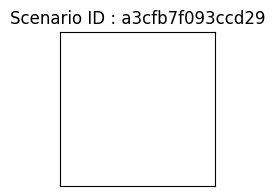

In [301]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2,2))
ax.title.set_text("Scenario ID : " + scenario.scenario_id)
ax.set_xticks([])
ax.set_yticks([])

### [1-1] 정적 맵 시각화

#### [1-1-1] 각 요소 하나씩 시각화 해보기

- map 종류에는 [lane, road_line, road_edge, stop_sign, crosswalk, speed_bump, diveway]가 있다. 하나씩 시각화하는 함수를 만들어본다

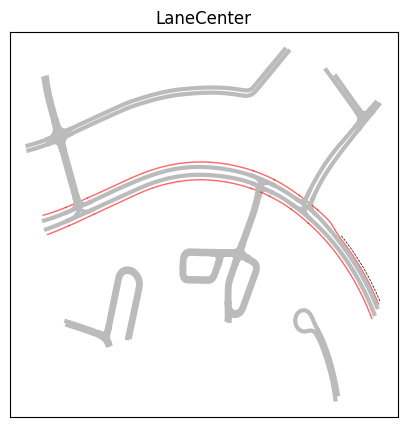

In [302]:
# LaneCenter lane 시각화
def visLaneCenter(ax, feature):
    x_points = []
    y_points = []
    z_points = []

    for p in feature.polyline:
      x_points.append(p.x)
      y_points.append(p.y)
      z_points.append(p.z)

    if feature.type == 0:
      # TYPE_UNDEFINED
      ax.plot(x_points, y_points, '--', c='#000', lw=0.5) # 검은색
    elif feature.type == 1:
      # TYPE_FREEWAY
      ax.plot(x_points, y_points, '-', c='#00F9', lw=1) # 파란색
    elif feature.type == 2:
      # TYPE_SURFACE_STREET (노면 도로)
      ax.plot(x_points, y_points, '-', c='#BBB', lw=3) # 연한 회색
    elif feature.type == 3:
      # TYPE_BIKE_LANE (자전거 도로)
      ax.plot(x_points, y_points, '-', c='#F009', lw=1) # 빨간색


fig, ax = plt.subplots(figsize=(5,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax, map_feature.lane)

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('LaneCenter')

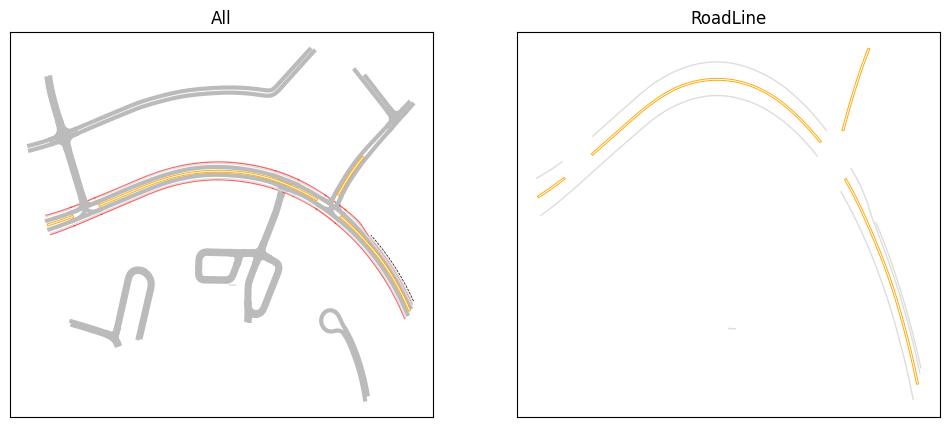

In [303]:
# RoadLine road_line 시각화
def visRoadLine(ax, feature):
    x_points = []
    y_points = []
    z_points = []

    for p in feature.polyline:
      x_points.append(p.x)
      y_points.append(p.y)
      z_points.append(p.z)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(x_points, y_points, linestyle='--', c='#000a', lw=1)
    elif feature.type == 1:
      # TYPE_BROKEN_SINGLE_WHITE
      ax.plot(x_points, y_points, linestyle='--', c='#ddd', lw=1)
    elif feature.type == 2:
      # TYPE_SOLID_SINGLE_WHITE
      ax.plot(x_points, y_points, linestyle='-', c='#ddd', lw=1)
    elif feature.type == 3:
      # TYPE_SOLID_DOUBLE_WHITE
      ax.plot(x_points, y_points, linestyle='-', c='#ddd', lw=2.1)
      ax.plot(x_points, y_points, linestyle='-', c='#ddd', lw=0.7)
    elif feature.type == 4:
      # TYPE_BROKEN_SINGLE_YELLOW
      ax.plot(x_points, y_points, '--', c='#FFA500A0', lw=1)
    elif feature.type == 5:
      # TYPE_BROKEN_DOUBLE_YELLOW
      ax.plot(x_points, y_points, '--', c='#FFA500F0', lw=3)
      ax.plot(x_points, y_points, '--', c='#FFF', lw=1)
    elif feature.type == 6:
      # TYPE_SOLID_SINGLE_YELLOW
      ax.plot(x_points, y_points, '-', c='#FFA500A0', lw=1)
    elif feature.type == 7:
      # TYPE_SOLID_DOUBLE_YELLOW
      ax.plot(x_points, y_points, '-', c='#FFA500F0', lw=2.1)
      ax.plot(x_points, y_points, '-', c='#FFF', lw=0.7)
    elif feature.type == 8:
      # TYPE_PASSING_DOUBLE_YELLOW
      ax.plot(x_points, y_points, '-', c='#FFA500F0', lw=2.1)
      ax.plot(x_points, y_points, '-', c='#FFF', lw=0.7)


fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    visRoadLine(ax_all, map_feature.road_line)
    visRoadLine(ax, map_feature.road_line)

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text('All')

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('RoadLine')

plt.show()

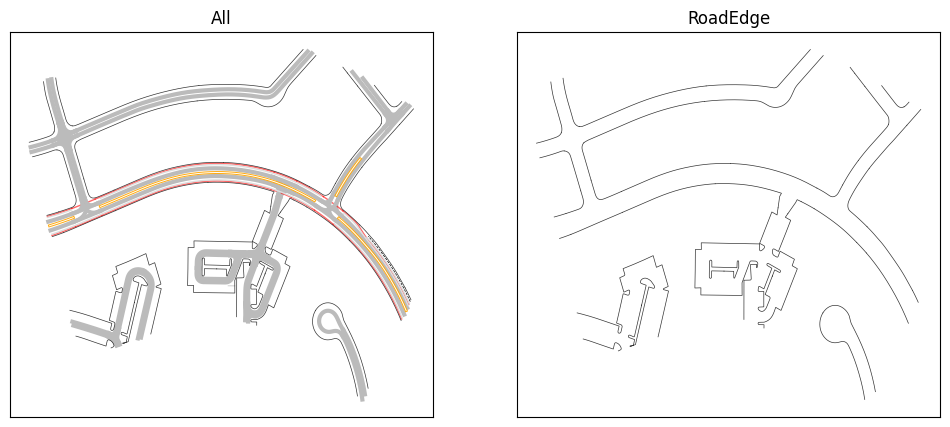

In [304]:
# RoadEdge road_edge 시각화
def visRoadEdge(ax, feature):
    x_points = []
    y_points = []
    z_points = []

    for p in feature.polyline:
      x_points.append(p.x)
      y_points.append(p.y)
      z_points.append(p.z)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(x_points, y_points, linestyle='-', c='#000', lw=0.5)
    elif feature.type == 1:
      # TYPE_ROAD_EDGE_BOUNDARY
      ax.plot(x_points, y_points, linestyle='-', c='#000c', lw=0.5)
    elif feature.type == 2:
      # TYPE_ROAD_EDGE_MEDIAN
      ax.plot(x_points, y_points, linestyle='--', c='#000c', lw=0.5)


fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    visRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    visRoadEdge(ax_all, map_feature.road_edge)
    visRoadEdge(ax, map_feature.road_edge)

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text('All')

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('RoadEdge')

plt.show()

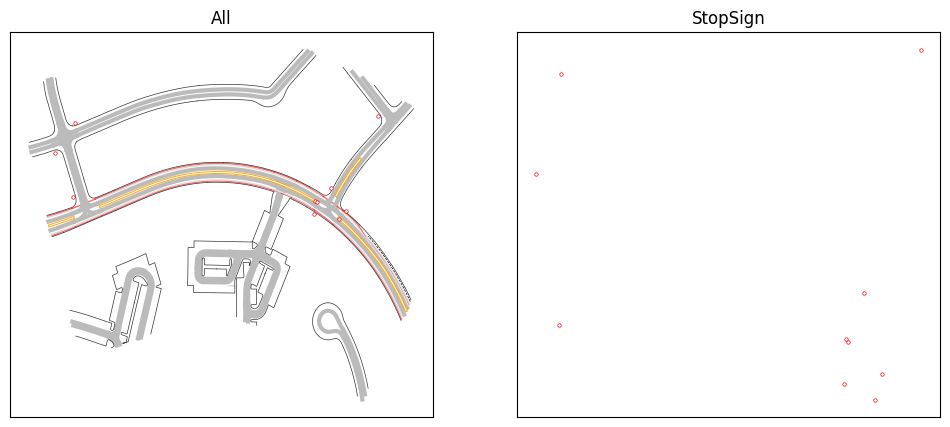

In [305]:
# StopSign stop_sign 시각화
def visStopSign(ax, feature):
  ax.plot(feature.position.x, feature.position.y, 'o', c='#f00', ms=2)
  ax.plot(feature.position.x, feature.position.y, 'o', c='#fff', ms=1)


fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    visRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    visRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    visStopSign(ax_all, map_feature.stop_sign)
    visStopSign(ax, map_feature.stop_sign)

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text('All')

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('StopSign')

plt.show()

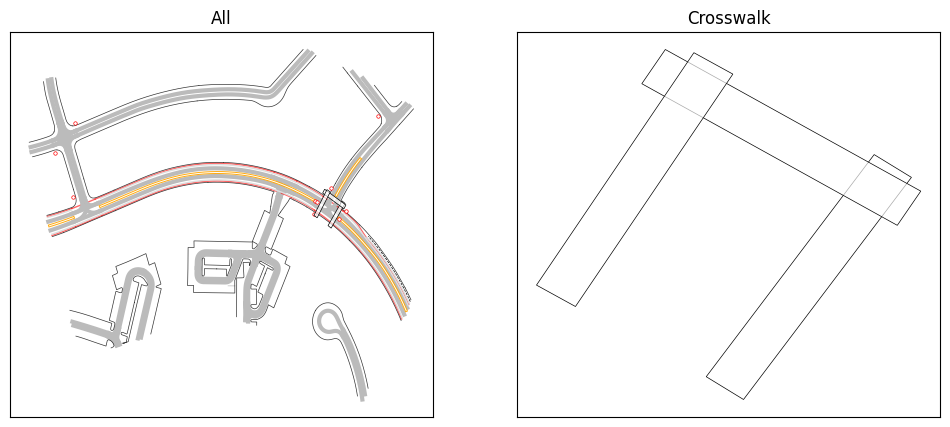

In [306]:
from matplotlib.patches import Polygon

# Crosswalk crosswalk 시각화
def visCrosswalk(ax, feature):
    points = []

    for p in feature.polygon:
      points.append([p.x, p.y])

    # 다각형 그리기
    polygon = Polygon(points,
                      facecolor='#FFFA', edgecolor='#000',
                      linewidth=0.5,
                      zorder=2)
    ax.add_patch(polygon)

fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    visRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    visRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    visStopSign(ax_all, map_feature.stop_sign)

for map_feature in scenario.map_features:
  if map_feature.HasField('crosswalk'):
    visCrosswalk(ax_all, map_feature.crosswalk)
    visCrosswalk(ax, map_feature.crosswalk)

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text('All')

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('Crosswalk')
ax.autoscale()

plt.show()

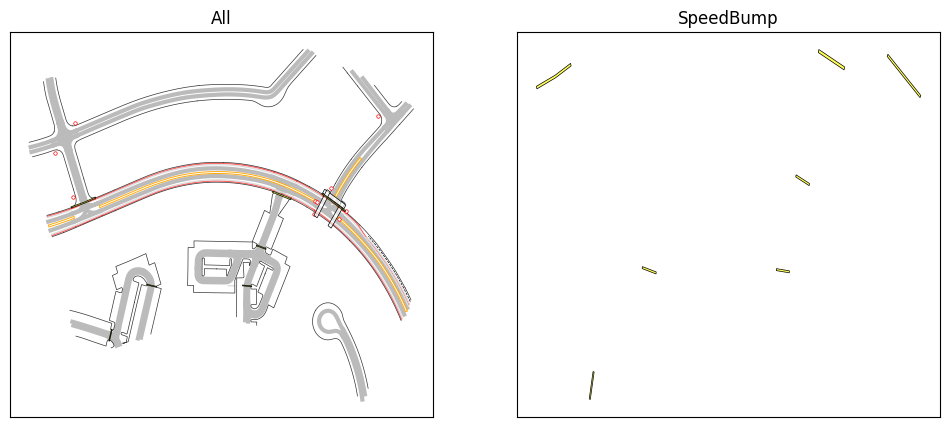

In [307]:
# SpeedBump speed_bump 시각화
def visSpeedBump(ax, feature):
    points = []

    for p in feature.polygon:
      points.append([p.x, p.y])

    # 다각형 그리기
    polygon = Polygon(points,
                      facecolor='#FF0A', edgecolor='#000',
                      linewidth=0.5,
                      zorder=2)
    ax.add_patch(polygon)

fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    visRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    visRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    visStopSign(ax_all, map_feature.stop_sign)

for map_feature in scenario.map_features:
  if map_feature.HasField('crosswalk'):
    visCrosswalk(ax_all, map_feature.crosswalk)

for map_feature in scenario.map_features:
  if map_feature.HasField('speed_bump'):
    visSpeedBump(ax_all, map_feature.speed_bump)
    visSpeedBump(ax, map_feature.speed_bump)

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text('All')

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('SpeedBump')
ax.autoscale()

plt.show()

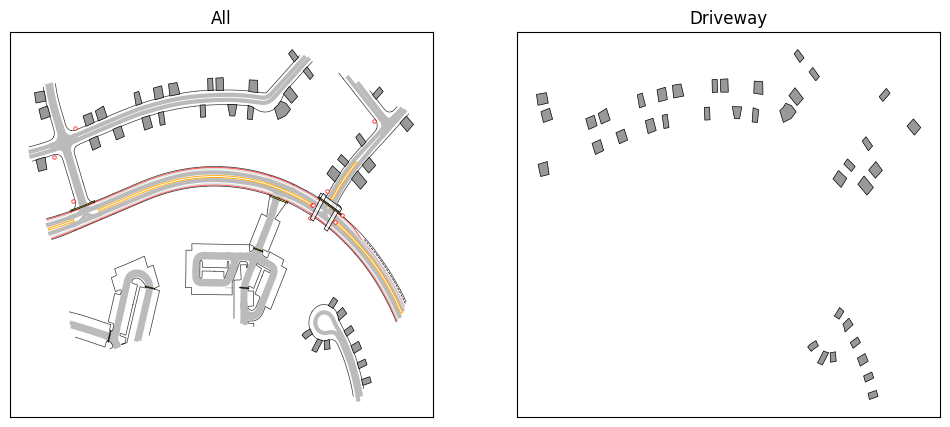

In [308]:
# Driveway driveway 시각화
def visDriveway(ax, feature):
    points = []

    for p in feature.polygon:
      points.append([p.x, p.y])

    # 다각형 그리기
    polygon = Polygon(points,
                      facecolor='#999', edgecolor='#000',
                      linewidth=0.5,
                      zorder=2)
    ax.add_patch(polygon)

fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    visLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    visRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    visRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    visStopSign(ax_all, map_feature.stop_sign)

for map_feature in scenario.map_features:
  if map_feature.HasField('crosswalk'):
    visCrosswalk(ax_all, map_feature.crosswalk)

for map_feature in scenario.map_features:
  if map_feature.HasField('speed_bump'):
    visSpeedBump(ax_all, map_feature.speed_bump)

for map_feature in scenario.map_features:
  if map_feature.HasField('driveway'):
    visDriveway(ax_all, map_feature.driveway)
    visDriveway(ax, map_feature.driveway)

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text('All')

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text('Driveway')
ax.autoscale()

plt.show()

#### [1-1-2] 위 코드를 합쳐서 정적 맵 시각화 클래스 만들기

In [309]:
class StaticMapFeatureVisualizer:

  def draw(self, scenario, ax):
    for map_feature in scenario.map_features:
      if map_feature.HasField('lane'):
          self.visLaneCenter(ax, map_feature.lane)
      elif map_feature.HasField('road_line'):
          self.visRoadLine(ax, map_feature.road_line)
      elif map_feature.HasField('road_edge'):
          self.visRoadEdge(ax, map_feature.road_edge)
      elif map_feature.HasField('stop_sign'):
          self.visStopSign(ax, map_feature.stop_sign)
      elif map_feature.HasField('crosswalk'):
          self.visCrosswalk(ax, map_feature.crosswalk)
      elif map_feature.HasField('speed_bump'):
          self.visSpeedBump(ax, map_feature.speed_bump)
      elif map_feature.HasField('driveway'):
          self.visDriveway(ax, map_feature.driveway)

    return

  def _seperate_polyline(self, polyline):
    X, Y, Z = [], [], []

    for p in polyline:
      X.append(p.x)
      Y.append(p.y)
      Z.append(p.z)
    
    return X, Y, Z
  
  def _create_polygon(self, polygon, facecolor, edgecolor,
                      linewidth=0.5,
                      zorder=2):
    points = []

    for p in polygon:
      points.append([p.x, p.y])

    polygon = Polygon(points,
              facecolor=facecolor, edgecolor=edgecolor,
              linewidth=linewidth,
              zorder=zorder)
    return polygon

  def visLaneCenter(self, ax, feature):
    ''' LaneCenter lane 시각화 '''
    X, Y, Z = self._seperate_polyline(feature.polyline)
    
    if feature.type == 0:
      # TYPE_UNDEFINED
      ax.plot(X, Y, '--', c='#000', lw=0.5) # 검은색
    elif feature.type == 1:
      # TYPE_FREEWAY
      ax.plot(X, Y, '-', c='#00F9', lw=1) # 파란색
    elif feature.type == 2:
      # TYPE_SURFACE_STREET (노면 도로)
      ax.plot(X, Y, '-', c='#BBB', lw=3, zorder=-1) # 연한 회색
    elif feature.type == 3:
      # TYPE_BIKE_LANE (자전거 도로)
      ax.plot(X, Y, '-', c='#F009', lw=1) # 빨간색

  def visRoadLine(self, ax, feature):
    ''' RoadLine road_line 시각화 '''
    X, Y, Z = self._seperate_polyline(feature.polyline)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(X, Y, linestyle='--', c='#000a', lw=1)
    elif feature.type == 1:
      # TYPE_BROKEN_SINGLE_WHITE
      ax.plot(X, Y, linestyle='--', c='#ddd', lw=1)
    elif feature.type == 2:
      # TYPE_SOLID_SINGLE_WHITE
      ax.plot(X, Y, linestyle='-', c='#ddd', lw=1)
    elif feature.type == 3:
      # TYPE_SOLID_DOUBLE_WHITE
      ax.plot(X, Y, linestyle='-', c='#ddd', lw=2.1)
      ax.plot(X, Y, linestyle='-', c='#ddd', lw=0.7)
    elif feature.type == 4:
      # TYPE_BROKEN_SINGLE_YELLOW
      ax.plot(X, Y, '--', c='#FFA500A0', lw=1)
    elif feature.type == 5:
      # TYPE_BROKEN_DOUBLE_YELLOW
      ax.plot(X, Y, '--', c='#FFA500F0', lw=3)
      ax.plot(X, Y, '--', c='#FFF', lw=1)
    elif feature.type == 6:
      # TYPE_SOLID_SINGLE_YELLOW
      ax.plot(X, Y, '-', c='#FFA500A0', lw=1)
    elif feature.type == 7:
      # TYPE_SOLID_DOUBLE_YELLOW
      ax.plot(X, Y, '-', c='#FFA500F0', lw=2.1)
      ax.plot(X, Y, '-', c='#FFF', lw=0.7)
    elif feature.type == 8:
      # TYPE_PASSING_DOUBLE_YELLOW
      ax.plot(X, Y, '-', c='#FFA500F0', lw=2.1)
      ax.plot(X, Y, '-', c='#FFF', lw=0.7)
  
  def visRoadEdge(self, ax, feature):
    ''' RoadEdge road_edge 시각화 '''
    X, Y, Z = self._seperate_polyline(feature.polyline)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(X, Y, linestyle='-', c='#000', lw=0.5)
    elif feature.type == 1:
      # TYPE_ROAD_EDGE_BOUNDARY
      ax.plot(X, Y, linestyle='-', c='#000c', lw=0.5)
    elif feature.type == 2:
      # TYPE_ROAD_EDGE_MEDIAN
      ax.plot(X, Y, linestyle='--', c='#000c', lw=0.5)

  def visStopSign(self, ax, feature):
    ''' StopSign stop_sign 시각화 '''
    ax.plot(feature.position.x, feature.position.y, 'o', c='#f00', ms=2)
    ax.plot(feature.position.x, feature.position.y, 'o', c='#fff', ms=1)

  def visCrosswalk(self, ax, feature):
    ''' Crosswalk crosswalk 시각화 '''
    polygon = self._create_polygon(feature.polygon,
                              facecolor='#FFFA', edgecolor='#000')
    ax.add_patch(polygon)

  
  def visSpeedBump(self, ax, feature):
    ''' SpeedBump speed_bump 시각화 '''
    polygon = self._create_polygon(feature.polygon,
                              facecolor='#FF0A', edgecolor='#000')
    ax.add_patch(polygon)

  def visDriveway(self, ax, feature):
    ''' Driveway driveway 시각화 '''
    polygon = self._create_polygon(feature.polygon,
                              facecolor='#999', edgecolor='#000')
    ax.add_patch(polygon)

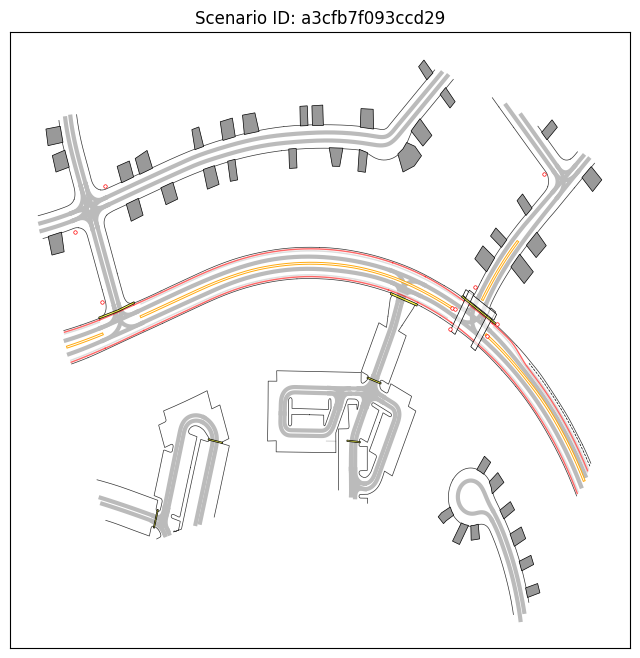

In [310]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.title.set_text(f'Scenario ID: {scenario.scenario_id}')
ax.set_xticks([])
ax.set_yticks([])

static_map_feature_visualizer = StaticMapFeatureVisualizer()
static_map_feature_visualizer.draw(scenario, ax)

plt.show()

### [1-2] 동적 맵 시각화

In [338]:
# 동적 맵 시각화 하기 좋은 시나리오 찾기
cnt = 0
for data in dataset:
  scenario = scenario_pb2.Scenario()
  scenario.ParseFromString(bytearray(data.numpy()))
  if cnt == 3:
    break
  cnt += 1

scenario.scenario_id

'a540704af740fe42'

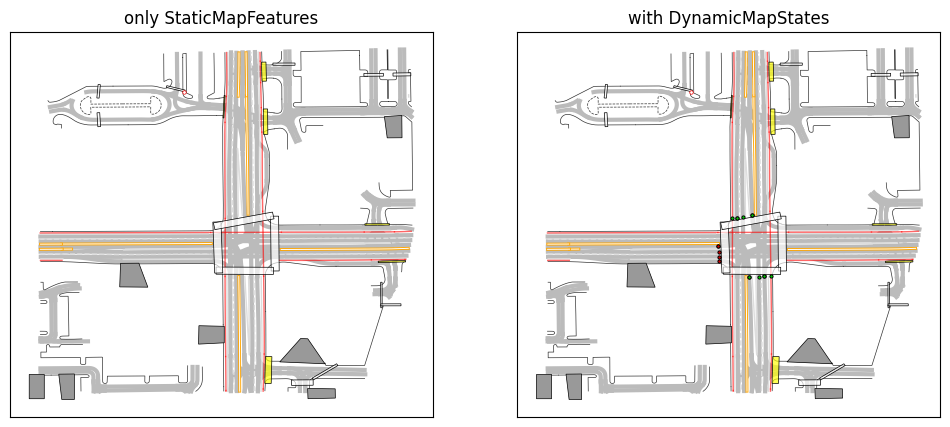

In [339]:
# TrafficSignalLaneState dynamic_map_states 시각화
def visTrafficSignal(ax, traffic):
  '''
  BASIC: o / ARROW: ^ / FLASHING: *
  '''
  state_shape = 'o'
  state_color = '#DDD'
  
  if traffic.state == 0:
    # LANE_STATE_UNKNOWN
    state_shape = 'x'
  elif traffic.state == 1:
    # LANE_STATE_ARROW_STOP
    state_shape = '^'
    state_color = '#F00'
  elif traffic.state == 2:
    # LANE_STATE_ARROW_CAUTION
    state_shape = '^'
    state_color = '#F90'
  elif traffic.state == 3:
    # LANE_STATE_ARROW_GO
    state_shape = '^'
    state_color = '#0F0'
  elif traffic.state == 4:
    # LANE_STATE_STOP
    state_color = '#F00'
  elif traffic.state == 5:
    # LANE_STATE_CAUTION
    state_color = '#F90'
  elif traffic.state == 6:
    # LANE_STATE_GO
    state_color = '#0F0'
  elif traffic.state == 7:
    # LANE_STATE_FLASHING_STOP
    state_shape = '*'
    state_color = '#F00'
  elif traffic.state == 8:
    # LANE_STATE_FLASHING_CAUTION
    state_shape = '*'
    state_color = '#F90'
    pass
  else:
    raise Exception("[X] Invalid Type")

  
  border = ax.plot(traffic.stop_point.x, traffic.stop_point.y,
          state_shape, c='#000', ms=2)
  inner  = ax.plot(traffic.stop_point.x, traffic.stop_point.y,
          state_shape, c=state_color, ms=0.5)

  return border, inner

fig, (ax, ax_all) = plt.subplots(1, 2, figsize=(12,5))

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text(f'only StaticMapFeatures')

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text(f'with DynamicMapStates')

# 정적 맵 시각화
static_map_feature_visualizer = StaticMapFeatureVisualizer()
static_map_feature_visualizer.draw(scenario, ax_all)
static_map_feature_visualizer.draw(scenario, ax)

# 동적 맵 시각화
for d_map_state in scenario.dynamic_map_states:
  for lane_state in d_map_state.lane_states:
    visTrafficSignal(ax_all, lane_state)

  # plot이 동적이 아니므로 일단 첫번째 장면에 대해서만 표현
  break

plt.show()

## [2] Agent 시각화

In [335]:
# 동적 맵 시각화 하기 좋은 시나리오 찾기
for data in dataset:
  scenario = scenario_pb2.Scenario()
  scenario.ParseFromString(bytearray(data.numpy()))
  if len(scenario.tracks_to_predict) > 0:
    # 예측해야 할 친구가 있는 부분만
    break

scenario.scenario_id

'a3cfb7f093ccd29'

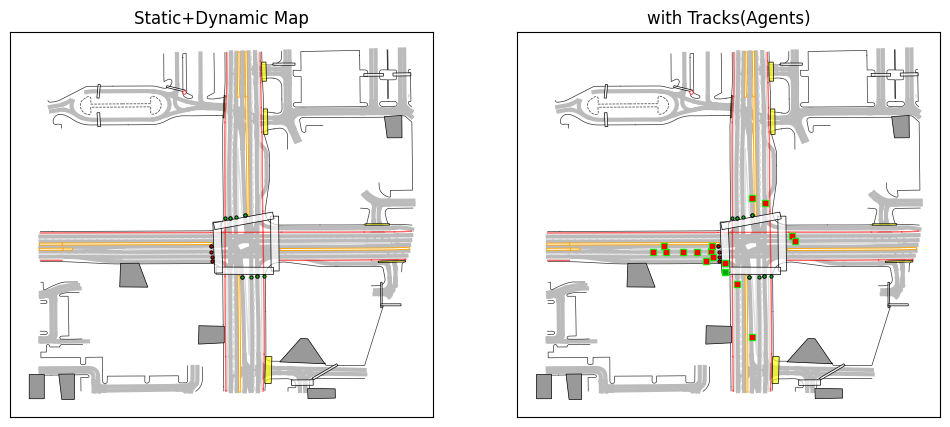

In [340]:
# TrafficSignalLaneState dynamic_map_states 시각화
def visAgent(ax, agent_type, state):
  if not state.valid:
    return

  agent_color = '#DDD'
  if agent_type == 0:
    # TYPE_UNSET
    pass
  elif agent_type == 1:
    # TYPE_VEHICLE
    agent_color = "#F00" # 빨간색
    pass
  elif agent_type == 2:
    # TYPE_PEDESTRIAN
    agent_color = "#0A0" # 초록색
    pass
  elif agent_type == 3:
    # TYPE_CYCLIST
    agent_color = "#00F" # 파란색
    pass
  elif agent_type == 4:
    # TYPE_OTHER
    agent_color = "#000"
  

  border = ax.plot(state.center_x, state.center_y,
          's', c='#0F0', ms=4)
  inner  = ax.plot(state.center_x, state.center_y,
          's', c=agent_color, ms=3)

  return border, inner

fig, (ax, ax_all) = plt.subplots(1, 2, figsize=(12,5))

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text(f'Static+Dynamic Map')

ax_all.set_xticks([])
ax_all.set_yticks([])
ax_all.title.set_text(f'with Tracks(Agents)')

# 정적 맵 시각화
static_map_feature_visualizer = StaticMapFeatureVisualizer()
static_map_feature_visualizer.draw(scenario, ax_all)
static_map_feature_visualizer.draw(scenario, ax)

# 동적 맵 시각화
for d_map_state in scenario.dynamic_map_states:
  for lane_state in d_map_state.lane_states:
    visTrafficSignal(ax, lane_state)
    visTrafficSignal(ax_all, lane_state)

  break # 첫번째 장면에 대해서만 표현

# Agent 시각화
for track in scenario.tracks:
  for state in track.states:
    visAgent(ax_all, track.object_type, state)
    break # 첫번째 장면에 대해서만 표현

plt.show()

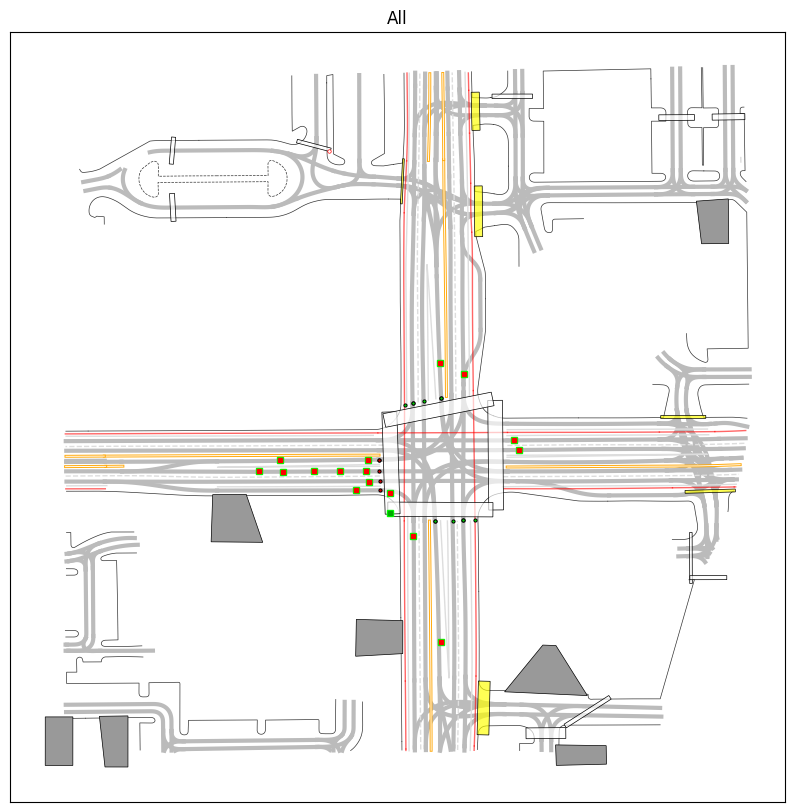

In [341]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xticks([])
ax.set_yticks([])
ax.title.set_text(f'All')

# 정적 맵 시각화
static_map_feature_visualizer = StaticMapFeatureVisualizer()
static_map_feature_visualizer.draw(scenario, ax)

# 동적 맵 시각화
for d_map_state in scenario.dynamic_map_states:
  for lane_state in d_map_state.lane_states:
    visTrafficSignal(ax, lane_state)

  break # 첫번째 장면에 대해서만 표현

# Agent 시각화
for track in scenario.tracks:
  for state in track.states:
    visAgent(ax, track.object_type, state)
    break # 첫번째 장면에 대해서만 표현

plt.show()

## [3] 시나리오 내 모든 step 애니메이션으로 만들기

- DynamicMap과 Agent 정보는 시간 흐름에 따라 변화함.
- 지금까지는 첫번째 Step에 대해서만 시각화를 진행.
- 이번에는 애니메이션을 이용해 step간 변화를 시각화

In [346]:
from matplotlib.animation import FuncAnimation
from IPython.core.display import display, HTML 

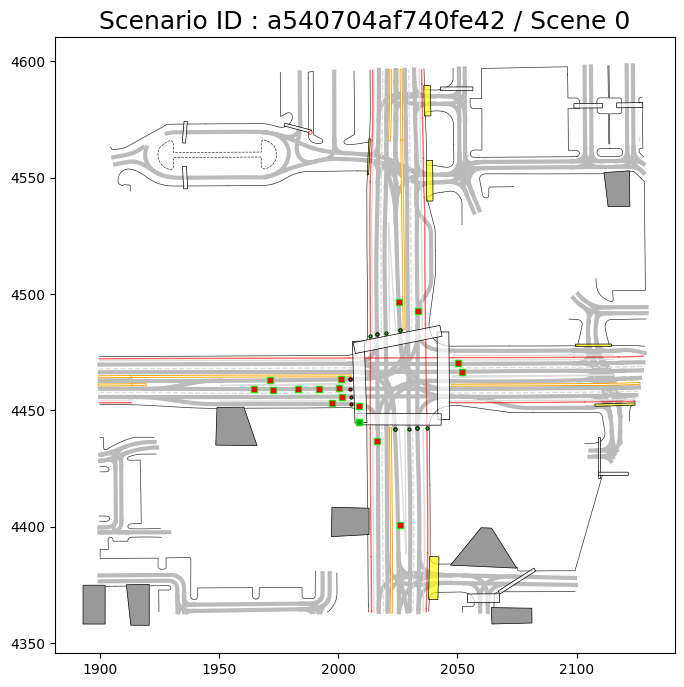

In [359]:
fig, ax = plt.subplots(figsize=(8,8))

# 정적 맵 시각화
static_map_feature_visualizer = StaticMapFeatureVisualizer()
static_map_feature_visualizer.draw(scenario, ax)

traffic_states = []
# 0번째 step만 dynamic map 그리기
d_map_state = scenario.dynamic_map_states[0]
for lane_state in d_map_state.lane_states:
  traffic_states.append(visTrafficSignal(ax, lane_state))


tracks = []
# 0번째 step만 agent 그리기
for track in scenario.tracks:
  state = track.states[0]
  tracks.append(visAgent(ax, track.object_type, state))

def updateFrame(idx):
  ax.set_title("Scenario ID : " + scenario.scenario_id + " / Scene " + str(idx), fontsize=18)

  # 동적 맵 시각화
  d_map_state = scenario.dynamic_map_states[idx]
  for state_idx, lane_state in enumerate(d_map_state.lane_states):
    if traffic_states[state_idx] == None:
      continue

    traffic_states[state_idx][0][0].set_data([lane_state.stop_point.x], [lane_state.stop_point.y])
    traffic_states[state_idx][1][0].set_data([lane_state.stop_point.x], [lane_state.stop_point.y])

  # Agent 시각화
  for track_idx, track in enumerate(scenario.tracks):
    state = track.states[idx]
    if tracks[track_idx] == None:
      continue
    
    tracks[track_idx][0][0].set_data([state.center_x], [state.center_y])
    tracks[track_idx][1][0].set_data([state.center_x], [state.center_y])

animation = FuncAnimation(fig, updateFrame, frames=range(len(scenario.timestamps_seconds)))
video_tag = HTML(animation.to_html5_video())
#display(video_tag) # 영상 출력 부분

# 기타

In [ ]:
# tutorial/5_dataset-visualization/gp-dataset-visualization.ipynb